In [71]:
import statsmodels.api as sm
from datetime import datetime, date, timedelta
import yfinance as yf

import numpy as np 
import pandas as pd

companies = ['XOM', 'GIS', 'LLY', 'BABA', 'AAPL']
numbers_symbols = len(companies)
start_date = date.today() - timedelta(weeks=52*10)
end_date = date.today()
df = yf.download(companies,
    start=start_date,
    end = end_date
)['Adj Close']
df.head()

[*********************100%***********************]  5 of 5 completed


,AAPL,BABA,GIS,LLY,XOM
Date,,,,,
2013-03-22,14.247963,NaN,34.517097,43.812992,58.387341
2013-03-25,14.299476,NaN,34.466919,43.852421,58.210800
2013-03-26,14.224213,NaN,34.861198,44.380657,58.936615
2013-03-27,13.944747,NaN,34.975895,44.443733,59.230885
2013-03-28,13.654183,NaN,35.348656,44.774879,58.923550


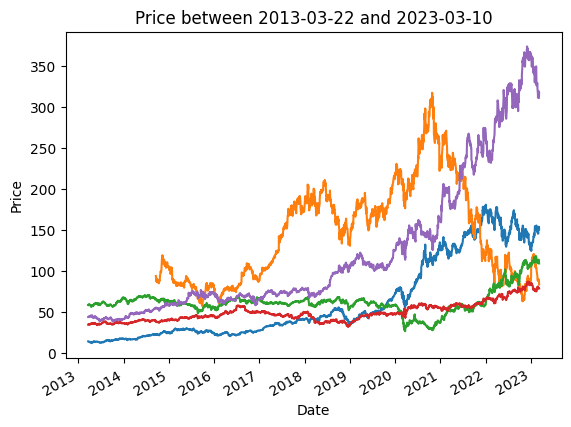

In [72]:
import matplotlib.pyplot as plt
plt.title('Price between {} and {}'.format(
    start_date.isoformat(),
    end_date.isoformat()
))
df['AAPL'].plot()
df['BABA'].plot()
df['XOM'].plot()
df['GIS'].plot()
df['LLY'].plot()

plt.ylabel('Price')
plt.xlabel('Date');

# finance things about portfolio optimisations
return / expected return / expected volatility / sharpe ratio
return over risks

In [73]:
#return over time 
log_return = np.log(1 + df.pct_change())
print(log_return)
#generate random weights 
random_wieghts = np.array(np.random.random(numbers_symbols))
#generate rebalance weights 
rebalance = random_wieghts / np.sum(random_wieghts)

#calculate the expected returns , annualized (252)
exp_ret = np.sum((log_return.mean() * rebalance) * 252)

# calculate expected volatility, annualized (matrix mult)
exp_vol = np.sqrt(
    np.dot(
    rebalance.T,
    np.dot(
    log_return.cov() * 252,
    rebalance
    )
    )
)

# calculate the sharpe ratio (without risk free rate)
sharpe_ratio = (exp_ret - .01) / exp_vol

#metrics in a df to be more clear 
mertics_df = pd.DataFrame(data = {
    'Expected portfolio return' : exp_ret,
    'Expected portfolio volatility' : exp_vol,
    'Portfolio Sharpe Ratio' : sharpe_ratio
}, index=[0])
display(mertics_df)

                AAPL      BABA       GIS       LLY       XOM
Date                                                        
2013-03-22       NaN       NaN       NaN       NaN       NaN
2013-03-25  0.003609       NaN -0.001455  0.000900 -0.003028
2013-03-26 -0.005277       NaN  0.011374  0.011974  0.012392
2013-03-27 -0.019843       NaN  0.003285  0.001420  0.004981
2013-03-28 -0.021057       NaN  0.010601  0.007423 -0.005202
...              ...       ...       ...       ...       ...
2023-03-03  0.034488 -0.000557  0.008199  0.010671  0.012578
2023-03-06  0.018370 -0.000892 -0.006175  0.001663  0.008825
2023-03-07 -0.014603 -0.009980 -0.000885 -0.026463 -0.019520
2023-03-08  0.008342 -0.020265  0.001643  0.006130 -0.014712
2023-03-09 -0.015027 -0.042045 -0.006717  0.013696 -0.007759

[2509 rows x 5 columns]


,Expected portfolio return,Expected portfolio volatility,Portfolio Sharpe Ratio
0,0.081675,0.253305,0.282961


1. care more about the directionality thant the actual price(up/down)
2. put some lag with the acf and pcf 
3. target when up : 0 and 1 when down
4. remove too old data 
5. Basic random forest (resistant to overfiting)
6. Split with attention to date (not train test split)

extending : 
add news macro economic condition, key stocks key secotrs, hour data ... 
can go farther without all of this
backtesting ...

In [74]:
start_date = date.today() - timedelta(weeks=52*10)
end_date = date.today()
AAPL = yf.download("AAPL",
    start=start_date,
    end = end_date
)
AAPL['tomorrow'] = AAPL['Adj Close'].shift(-1)
AAPL['target'] = (AAPL['tomorrow'] > AAPL['Adj Close']).astype(int)
AAPL

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,tomorrow,target
Date,,,,,,,,
2013-03-22,16.235001,16.503571,16.182501,16.496786,14.247964,395105200,14.299475,1
2013-03-25,16.596071,16.783930,16.492144,16.556429,14.299475,501135600,14.224213,0
2013-03-26,16.622856,16.637142,16.447500,16.469286,14.224213,294294000,13.944750,0
2013-03-27,16.302143,16.314285,16.097500,16.145714,13.944750,331237200,13.654183,0
2013-03-28,16.065001,16.136429,15.772143,15.809286,13.654183,442839600,13.230051,0
...,...,...,...,...,...,...,...,...
2023-03-03,148.039993,151.110001,147.330002,151.029999,151.029999,70668500,153.830002,1
2023-03-06,153.789993,156.300003,153.460007,153.830002,153.830002,87558000,151.600006,0
2023-03-07,153.699997,154.029999,151.130005,151.600006,151.600006,56182000,152.869995,1


In [75]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=42)
# simple split
train = AAPL.iloc[:-100]
test = AAPL.iloc[-100:]

predictors = ["Adj Close", "Volume", "Open", "High", "Low", "Close"]
model.fit(train[predictors], train["target"])


RandomForestClassifier(min_samples_split=100, random_state=42)

In [76]:
from sklearn.metrics import precision_score

# precision is great for this case 
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
preds
precision_score(test["target"], preds)
comb = pd.concat([test["target"], preds], axis=1)

<Axes: xlabel='Date'>

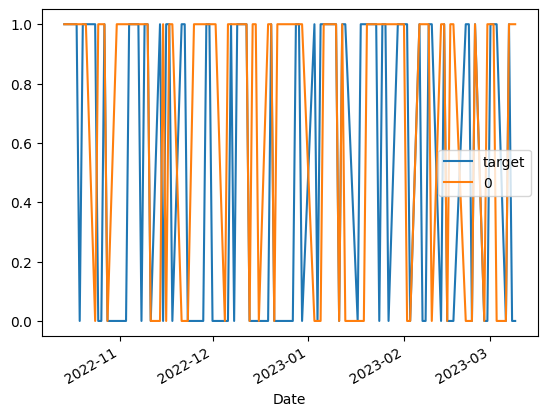

In [77]:
comb.plot()

In [78]:
def predict(train, test, predictors, model): 
    model.fit(train[predictors], train["target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name='Prediction')
    comb = pd.concat([test["target"], preds], axis=1)
    return comb


In [79]:
def backtest(data, model, predictors,start=2500, step=250):
    all_preds = []

    for i in range(start, data.shape[0],step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        prediction = predict(train,test,predictors,model)
        all_preds.append(prediction)
    return pd.concat(all_preds)


In [80]:
predictionn = backtest(AAPL, model, predictors)
predictionn

,target,Prediction
Date,,
2023-02-27,0,0
2023-02-28,0,1
2023-03-01,1,1
2023-03-02,1,1
2023-03-03,1,1
2023-03-06,0,0
2023-03-07,1,0
2023-03-08,0,0
2023-03-09,0,1


In [81]:
predictionn['Prediction'].value_counts()
precision_score(predictionn['target'], predictionn["Prediction"])

0.6

# ARMA model 
forecasting the return 
attention for the stationarity -> returns are more stationary 
ACF and PACF 
spikes to choose lags (acf -> MA )
PACF -> AR part


In [83]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

AAPL['return'] = np.log(1 + AAPL['Adj Close'].pct_change())
